In [1]:
from hypernetworks.core.Hypernetwork import Hypernetwork
from hypernetworks.utils.HTCompiler import load_parser, compile_hn
from hypernetworks.utils.HTGraph import draw_hn

from hypernetworks.utils.HTSpaces import get_space
from hypernetworks.utils.HTSearch import what_is_it

from IPython.display import Image, display

parser = load_parser()

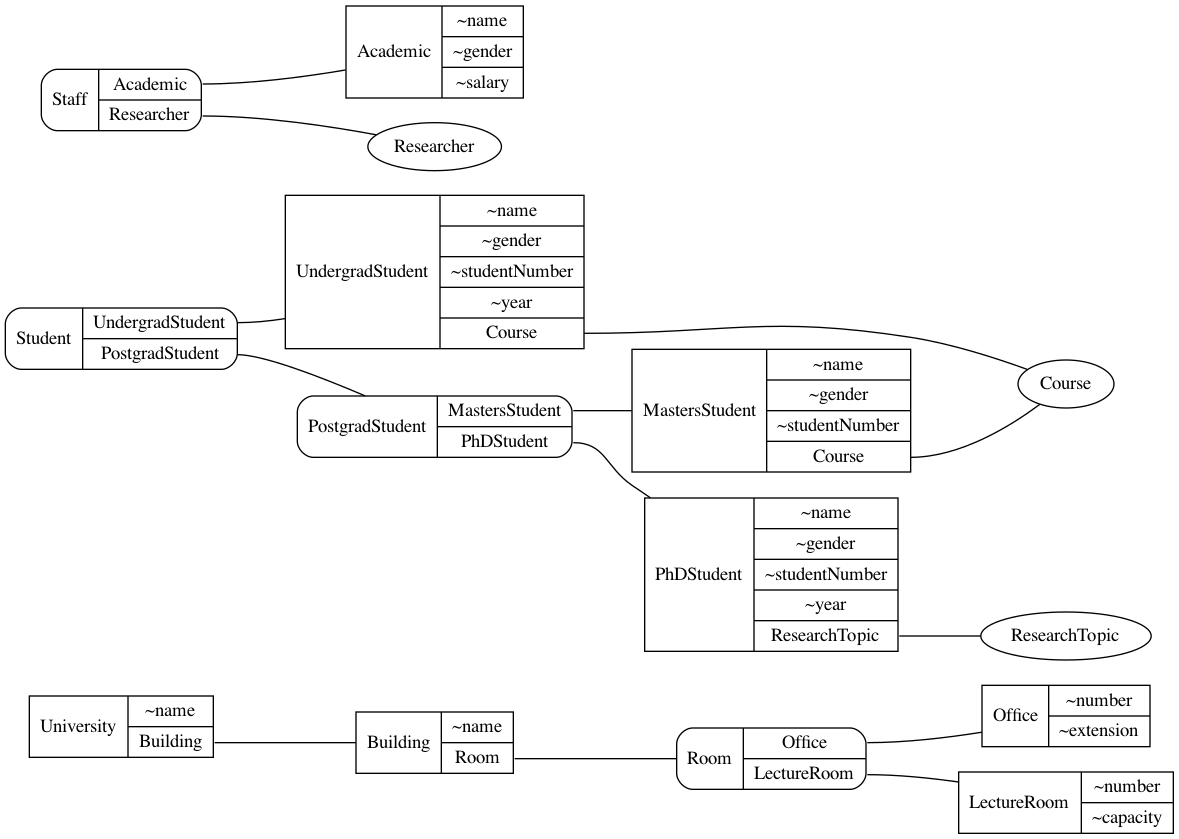

In [2]:
uni_backcloth_hn = Hypernetwork()

compile_hn(uni_backcloth_hn, parser, """
    University=<~name, Building=<~name, Room={Office, LectureRoom}>>
    Office=<~number, ~extension>
    LectureRoom=<~number, ~capacity>
    
    Student={UndergradStudent, PostgradStudent={MastersStudent, PhDStudent}}
    UndergradStudent=<~name, ~gender, ~studentNumber, ~year, Course>
    MastersStudent=<~name, ~gender, ~studentNumber, Course>
    PhDStudent=<~name, ~gender, ~studentNumber, ~year, ResearchTopic>
    
    Staff={Academic, Researcher}
    Academic=<~name, ~gender, ~salary>
""")

draw_hn(uni_backcloth_hn, fname="/tmp/UML-university-backcloth-hn", view=False, split_camel=False, direction="LR")
Image(filename='/tmp/UML-university-backcloth-hn.png', width=900, height=1200)

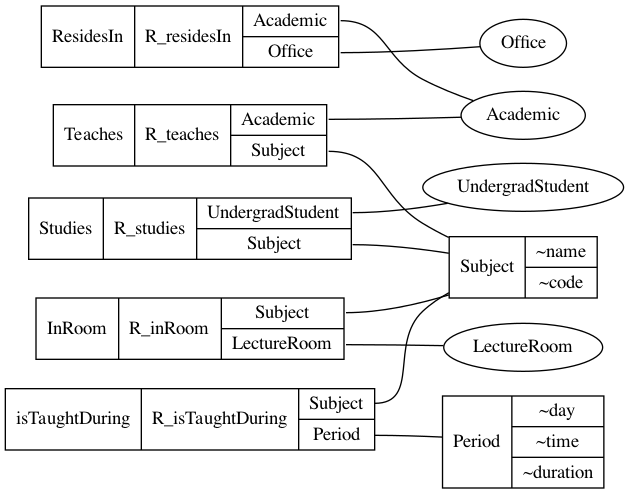

In [3]:
uni_assoc_hn = Hypernetwork()

compile_hn(uni_assoc_hn, parser, """
    Subject=<~name, ~code>

    Teaches=<Academic, Subject; R_teaches>
    Studies=<UndergradStudent, Subject; R_studies>
    ResidesIn=<Academic, Office; R_residesIn>
    InRoom=<Subject, LectureRoom; R_inRoom>
    isTaughtDuring=<Subject, Period; R_isTaughtDuring>

    Period=<~day, ~time, ~duration>
""")

draw_hn(uni_assoc_hn, fname="/tmp/UML-university-assoc-hn", view=False, split_camel=False, direction="LR")
Image(filename='/tmp/UML-university-assoc-hn.png', width=500, height=1200)

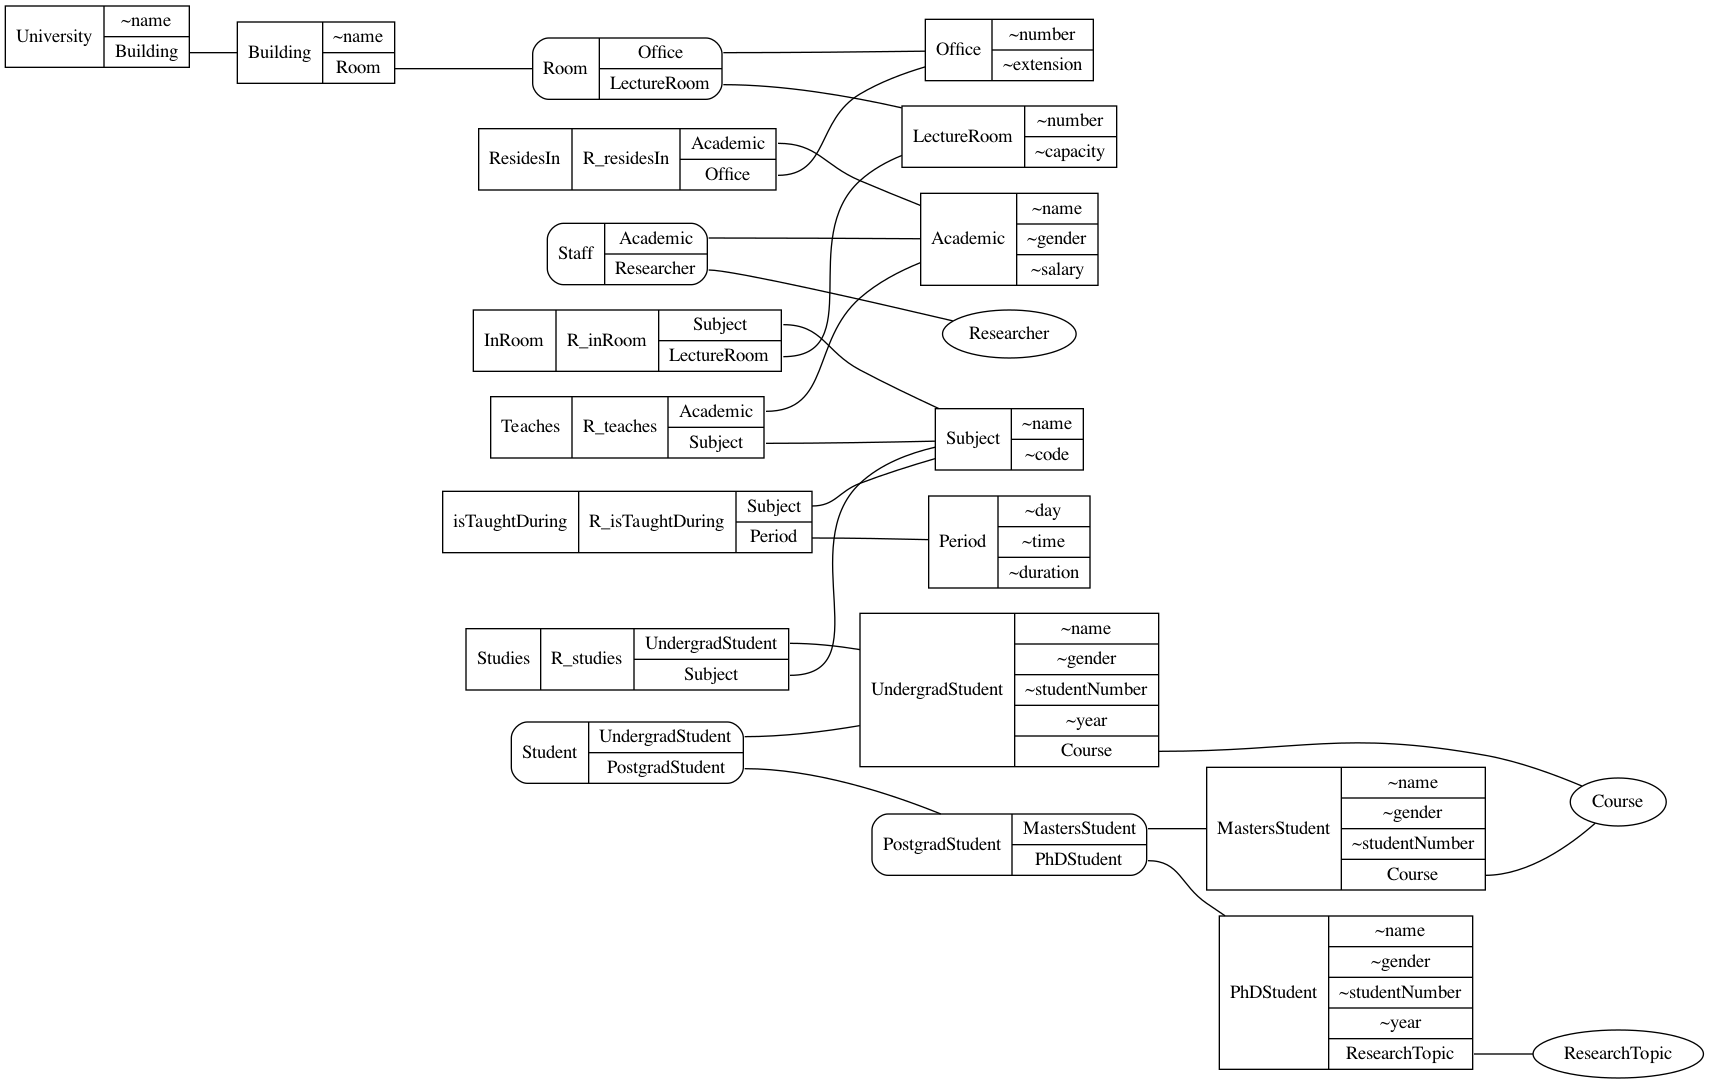

In [4]:
uni_hn = Hypernetwork()

uni_hn.union(uni_backcloth_hn)
uni_hn.union(uni_assoc_hn)

draw_hn(uni_hn, fname="/tmp/UML-university-hn", view=False, direction="LR", split_camel=False)
Image(filename='/tmp/UML-university-hn.png', width=1000, height=1200)

Studies=<UndergradStudent, Subject; R_studies>
Subject=<~name, ~code>



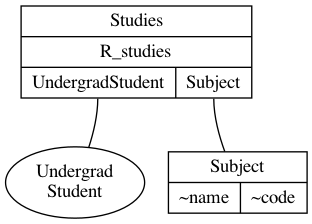

In [5]:
space = get_space(uni_hn, True, True, "Student", "Studies", "Subject")

if space:
    print(space)

draw_hn(space, fname="/tmp/UML-university-space", view=False)
Image(filename='/tmp/UML-university-space.png', width=300, height=500)

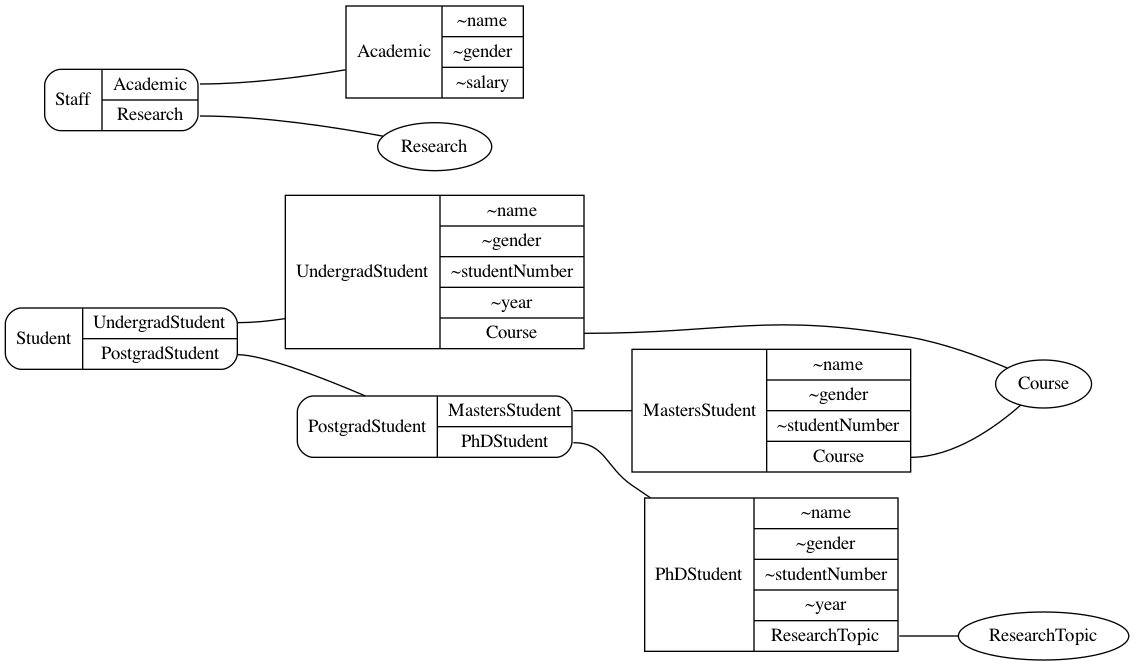

In [6]:
person_hn = Hypernetwork()

compile_hn(person_hn, parser, """
    Student={UndergradStudent, PostgradStudent={MastersStudent, PhDStudent}}
    UndergradStudent=<~name, ~gender, ~studentNumber, ~year, Course>
    MastersStudent=<~name, ~gender, ~studentNumber, Course>
    PhDStudent=<~name, ~gender, ~studentNumber, ~year, ResearchTopic>
    
    Staff={Academic, Research}
    Academic=<~name, ~gender, ~salary>
""")

draw_hn(person_hn, fname="/tmp/UML-university-person-hn", view=False, split_camel=False, direction="LR")
Image(filename='/tmp/UML-university-person-hn.png', width=800, height=1200)

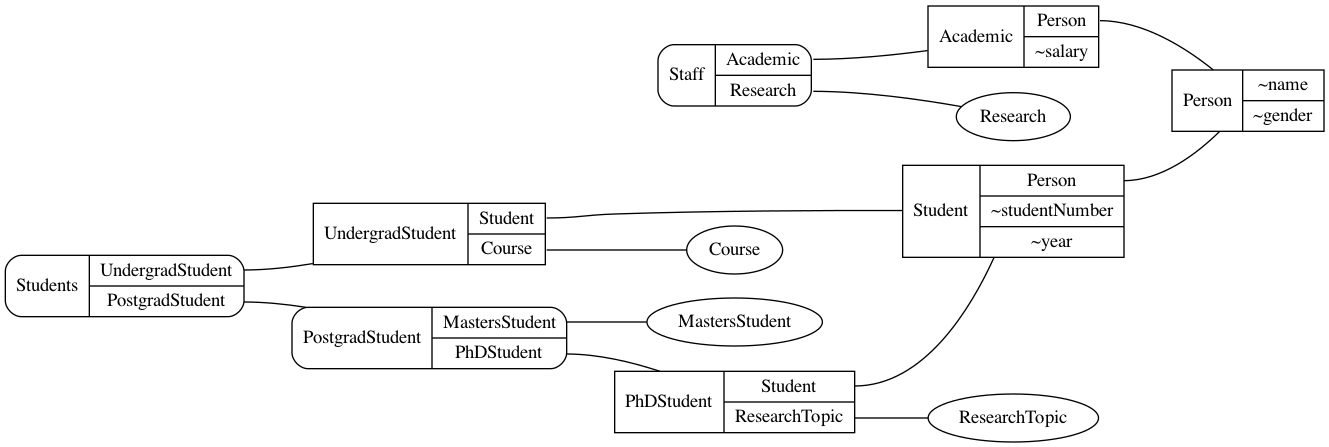

In [7]:
person2_hn = Hypernetwork()

compile_hn(person2_hn, parser, """
    Students={UndergradStudent, PostgradStudent={MastersStudent, PhDStudent}}
    UndergradStudent=<Student, Course>
    MastersStudent=<Student, Course>
    PhDStudent=<Student, ResearchTopic>
    Student=<Person, ~studentNumber, ~year>
    
    Staff={Academic, Research}
    Academic=<Person, ~salary>
    
    Person=<~name, ~gender>
""")

draw_hn(person2_hn, fname="/tmp/UML-university-person2-hn", view=False, split_camel=False, direction="LR")
Image(filename='/tmp/UML-university-person2-hn.png', width=1000, height=1200)

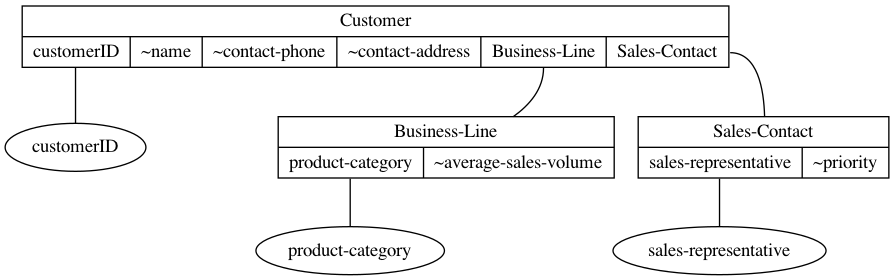

In [8]:
customer_hn = Hypernetwork()

compile_hn(customer_hn, parser, """
    Customer=<customerID, ~name, ~contact-phone, ~contact-address,
            Business-Line=<product-category, ~average-sales-volume>,
            Sales-Contact=<sales-representative, ~priority>>
""")

draw_hn(customer_hn, fname="/tmp/DDD-customer-hn", view=False, split_camel=False)
Image(filename='/tmp/DDD-customer-hn.png', width=700, height=1200)

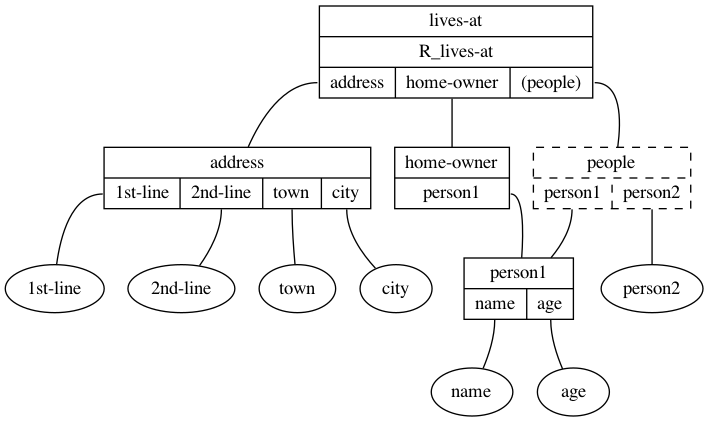

In [9]:
people2_hn = Hypernetwork()

compile_hn(people2_hn, parser, """
    lives-at=<address, home-owner=<person1>, people=(person1, person2); R_lives-at>
    address=<1st-line, 2nd-line, town, city>
    person1=<name, age>
""")

draw_hn(people2_hn, fname="/tmp/HT-people2-hn", view=False, split_camel=False)
Image(filename='/tmp/HT-people2-hn.png', width=700, height=1200)

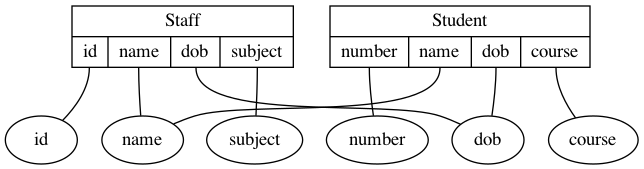

In [10]:
person1_hn = Hypernetwork()

compile_hn(person1_hn, parser, """
    Staff=<id, name, dob, subject>
    Student=<number, name, dob, course>
""")

draw_hn(person1_hn, fname="/tmp/HT-person1-hn", view=False, split_camel=False)
Image(filename='/tmp/HT-person1-hn.png', width=600, height=1200)

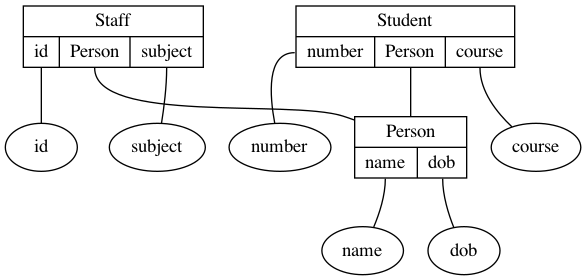

In [11]:
person2_hn = Hypernetwork()

compile_hn(person2_hn, parser, """
    Staff=<id, Person, subject>
    Student=<number, Person, course>
    Person=<name, dob>
""")

draw_hn(person2_hn, fname="/tmp/HT-person2-hn", view=False, split_camel=False)
Image(filename='/tmp/HT-person2-hn.png', width=650, height=1200)

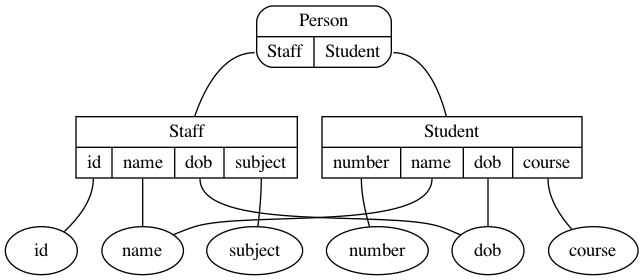

In [12]:
person3_hn = Hypernetwork()

compile_hn(person3_hn, parser, """
    Person={Staff, Student}
    Staff=<id, name, dob, subject>
    Student=<number, name, dob, course>
""")

draw_hn(person3_hn, fname="/tmp/HT-person3-hn", view=False, split_camel=False)
Image(filename='/tmp/HT-person3-hn.png', width=650, height=1200)